In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

tf.keras.backend.clear_session()

In [3]:
train_data = pd.read_csv("dataset/regression/mercedes-benz-greener-manufacturing/train.csv")
len(train_data)

4209

In [4]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data["X0"].dtype

dtype('O')

In [6]:
train_data.isna().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
train_data.X0.unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [9]:
cat_dict = {}
for label, content in train_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        cat_dict[label] = sorted(train_data[label].unique())

In [10]:
cat_dict.get("X0")

['a',
 'aa',
 'ab',
 'ac',
 'ad',
 'af',
 'ai',
 'aj',
 'ak',
 'al',
 'am',
 'ao',
 'ap',
 'aq',
 'as',
 'at',
 'au',
 'aw',
 'ax',
 'ay',
 'az',
 'b',
 'ba',
 'bc',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [11]:
for label, content in train_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        train_data[label] = content.astype("category")
        train_data[label] = pd.Categorical(content, categories=cat_dict.get(label)).codes + 1

In [12]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,33,24,18,1,4,25,10,15,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,33,22,20,5,4,29,12,15,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,21,25,35,3,4,28,10,24,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,21,22,35,6,4,28,12,5,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,21,24,35,6,4,13,4,14,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_data[train_data.X0 == 0]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


In [14]:
test_data = pd.read_csv("dataset/regression/mercedes-benz-greener-manufacturing/test.csv")
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
for label, content in test_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        test_data[label] = content.astype("category")
        test_data[label] = pd.Categorical(content, categories=cat_dict.get(label)).codes + 1

In [16]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,24,35,6,4,0,1,23,0,...,0,0,0,1,0,0,0,0,0,0
1,2,41,4,8,1,4,0,7,25,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,24,17,6,4,0,10,10,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,14,35,6,4,0,12,14,0,...,0,0,0,1,0,0,0,0,0,0
4,5,44,21,17,3,4,29,9,13,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
test_data[test_data.X0 == 0]

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
153,289,0,5,3,3,4,15,7,6,0,...,0,0,1,0,0,0,0,0,0,0
311,624,0,14,17,6,4,14,10,21,0,...,0,0,0,0,0,0,0,0,0,0
2914,5816,0,5,3,3,4,21,5,23,0,...,0,0,1,0,0,0,0,0,0,0
3281,6585,0,4,3,3,4,22,10,5,0,...,0,0,1,0,0,0,0,0,0,0
3718,7420,0,24,17,1,4,26,1,7,0,...,0,0,1,0,0,0,0,0,0,0
3913,7805,0,22,20,6,4,27,1,7,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
split_size = int(0.8 * len(train_data))
train_features, train_target = train_data.drop(["ID", "y"], axis = 1).to_numpy()[:split_size], train_data["y"].to_numpy()[:split_size]
val_features, val_target = train_data.drop(["ID", "y"], axis = 1).to_numpy()[split_size:], train_data["y"].to_numpy()[split_size:]

In [19]:
len(train_features), len(train_target), len(val_features), len(val_target)

(3367, 3367, 842, 842)

In [20]:
train_features

array([[33, 24, 18, ...,  0,  0,  0],
       [33, 22, 20, ...,  0,  0,  0],
       [21, 25, 35, ...,  0,  0,  0],
       ...,
       [28,  5, 34, ...,  0,  0,  0],
       [45, 20, 21, ...,  0,  0,  0],
       [40,  4,  4, ...,  0,  0,  0]], dtype=int64)

In [21]:
train_target

array([130.81,  88.53,  76.26, ...,  91.46, 108.76, 118.93])

In [22]:
train_features[0].shape

(376,)

In [23]:
# Create performant datasets
train_features_1 = tf.data.Dataset.from_tensor_slices(tf.cast(train_features, dtype=tf.float32))
train_target_1 = tf.data.Dataset.from_tensor_slices(tf.cast(train_target, dtype=tf.float32))
train_dataset_1 = tf.data.Dataset.zip((train_features_1, train_target_1)).batch(32).prefetch(tf.data.AUTOTUNE)

val_features_1 = tf.data.Dataset.from_tensor_slices(tf.cast(val_features, dtype=tf.float32))
val_target_1 = tf.data.Dataset.from_tensor_slices(tf.cast(val_target, dtype=tf.float32))
val_dataset_1 = tf.data.Dataset.zip((val_features_1, val_target_1)).batch(32).prefetch(tf.data.AUTOTUNE)

In [246]:
# Callbacks
import datetime
import os

CHECKPOINT_PATH = "model_experiments/greener_manufacturing"
LOGS_PATH = "model_logs/greener_manufacturing"

def checkpoint(model_name):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(CHECKPOINT_PATH, model_name), 
                                              save_best_only=True, 
                                              monitor="val_loss")

def tensorboard(model_name):
    return tf.keras.callbacks.TensorBoard(os.path.join(LOGS_PATH, model_name, datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.1, min_lr=1e-5, verbose=1)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/10), verbose=1)

In [33]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(376,), dtype=tf.float32)
x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)

model_1 = tf.keras.Model(inputs, outputs, name="model_1")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

In [34]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 376)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               48256     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 64,897
Trainable params: 64,897
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_1_history = model_1.fit(train_dataset_1,
                              validation_data=val_dataset_1,
                              epochs=10,
                              steps_per_epoch=len(train_dataset_1),
                              validation_steps=len(val_dataset_1),
                              callbacks=[tensorboard(model_1.name),
                                         checkpoint(model_1.name),
                                         early_stopping,
                                         reduce_lr])

Epoch 1/10
106/106 [==============================] - 10s 28ms/step - loss: 28.0024 - val_loss: 8.7729 - lr: 0.0010
Epoch 2/10
106/106 [==============================] - 2s 16ms/step - loss: 8.5300 - val_loss: 8.0378 - lr: 0.0010
Epoch 3/10
106/106 [==============================] - 2s 19ms/step - loss: 7.9659 - val_loss: 7.8492 - lr: 0.0010
Epoch 4/10
106/106 [==============================] - 2s 22ms/step - loss: 7.7715 - val_loss: 7.7905 - lr: 0.0010
Epoch 5/10
106/106 [==============================] - 2s 18ms/step - loss: 6.9593 - val_loss: 7.3891 - lr: 0.0010
Epoch 6/10
106/106 [==============================] - 2s 16ms/step - loss: 6.6400 - val_loss: 7.1448 - lr: 0.0010
Epoch 7/10
106/106 [==============================] - 2s 17ms/step - loss: 6.4633 - val_loss: 7.0667 - lr: 0.0010
Epoch 8/10
106/106 [==============================] - 2s 15ms/step - loss: 6.3944 - val_loss: 6.9648 - lr: 0.0010
Epoch 9/10
106/106 [==============================] - 1s 14ms/step - loss: 6.2943 - va

In [36]:
from sklearn.metrics import r2_score

In [40]:
model_1_preds = model_1.predict(val_dataset_1)
tf.squeeze(model_1_preds)

<tf.Tensor: shape=(842,), dtype=float32, numpy=
array([108.26427 ,  90.18392 , 109.08108 ,  92.66478 , 106.99931 ,
        91.10764 ,  87.19774 , 111.068   ,  90.52078 , 103.559944,
       100.81326 ,  92.52583 , 110.83441 , 110.58621 ,  92.261024,
        95.82588 , 108.04601 , 109.09022 ,  77.69963 ,  98.13727 ,
        97.10927 ,  91.226654, 110.71694 ,  92.65742 ,  88.02055 ,
       100.51894 , 112.85677 ,  91.7881  , 105.903336,  94.6952  ,
       107.329704, 105.35341 ,  95.71992 , 106.92418 , 102.17631 ,
        94.017204, 108.81328 ,  91.88544 ,  93.96883 ,  75.88628 ,
        90.62642 ,  91.295975, 110.05093 ,  92.871216,  94.48992 ,
        93.88432 , 100.34436 ,  94.69303 ,  94.60633 , 103.03981 ,
       108.287384,  77.6352  ,  85.77764 ,  92.414406, 106.623825,
       109.25921 ,  91.051315,  94.82184 , 107.64351 , 109.58798 ,
        95.70739 , 107.33075 , 106.45076 ,  93.042755, 100.90798 ,
        91.26719 ,  93.70541 , 106.59866 ,  89.37452 , 107.04807 ,
       103.688

In [38]:
val_target

array([108.21, 105.82, 108.19,  94.62, 110.46,  88.98, 108.84, 109.93,
       104.89,  99.65, 103.19, 110.43, 107.74, 111.59,  91.38,  91.17,
       109.6 , 107.53,  74.99,  86.25,  91.16,  88.59, 117.52,  85.55,
        89.88, 117.36, 113.8 ,  92.42, 106.5 , 105.49, 118.27, 112.05,
        92.73, 108.83,  98.91,  95.5 , 104.82,  88.28,  91.99,  73.74,
        85.44,  89.94, 109.67,  89.06,  98.13,  92.55, 118.31, 114.23,
        94.1 , 100.59, 108.97,  75.85,  89.08,  89.34, 108.68, 109.64,
        88.05,  86.61, 112.8 , 107.43,  89.28, 112.83, 107.38,  92.05,
        96.49,  87.12,  89.2 , 107.14,  88.08, 109.7 , 101.99,  96.98,
        90.84, 103.11, 110.16, 139.07,  92.44, 109.42,  96.82,  98.81,
       104.18, 109.66,  89.8 , 107.93,  96.41,  87.  , 109.31,  89.69,
       100.11,  97.28, 107.48,  88.05,  77.23, 106.72,  86.81, 109.34,
       111.51,  93.81, 100.8 ,  96.26,  97.14,  98.03,  76.56, 129.65,
        89.15,  97.93, 106.1 ,  86.73,  97.63, 107.85,  88.98,  95.98,
      

In [39]:
model_1_r2 = r2_score(val_target, tf.squeeze(model_1_preds))
model_1_r2

0.25526499305413186

In [43]:
model_1_test_preds = model_1.predict(test_data.drop("ID", axis=1).to_numpy())
model_1_test_preds

array([[62.182545],
       [73.1666  ],
       [61.186077],
       ...,
       [77.87312 ],
       [84.02927 ],
       [76.05273 ]], dtype=float32)

In [44]:
model_2 = tf.keras.models.clone_model(model_1)
model_2._name = "model_2_lr_scheduler"

In [54]:
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2_history = model_2.fit(train_dataset_1,
                              validation_data=val_dataset_1,
                              epochs=20,
                              callbacks=[lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
106/106 [==============================] - 1s 8ms/step - loss: 10.1303 - val_loss: 9.5435 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0012589254117941673.
Epoch 2/20
106/106 [==============================] - 1s 8ms/step - loss: 10.1257 - val_loss: 9.5370 - lr: 0.0013

Epoch 3: LearningRateScheduler setting learning rate to 0.0015848931924611136.
Epoch 3/20
106/106 [==============================] - 1s 6ms/step - loss: 10.1250 - val_loss: 9.5354 - lr: 0.0016

Epoch 4: LearningRateScheduler setting learning rate to 0.0019952623149688794.
Epoch 4/20
106/106 [==============================] - 1s 6ms/step - loss: 10.1243 - val_loss: 9.5336 - lr: 0.0020

Epoch 5: LearningRateScheduler setting learning rate to 0.0025118864315095803.
Epoch 5/20
106/106 [==============================] - 1s 6ms/step - loss: 10.1227 - val_loss: 9.5268 - lr: 0.0025

Epoch 6: LearningRateScheduler setting learni

In [47]:
import matplotlib.pyplot as plt

<Axes: >

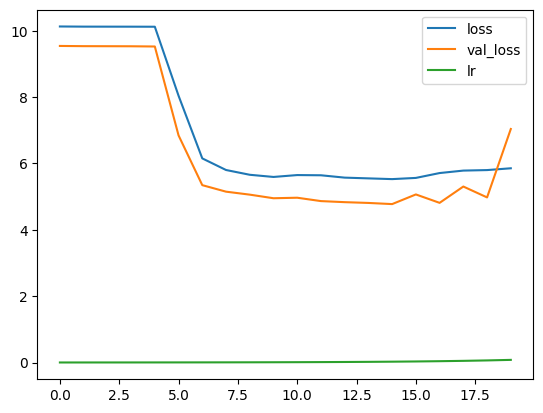

In [55]:
pd.DataFrame(model_2_history.history).plot()

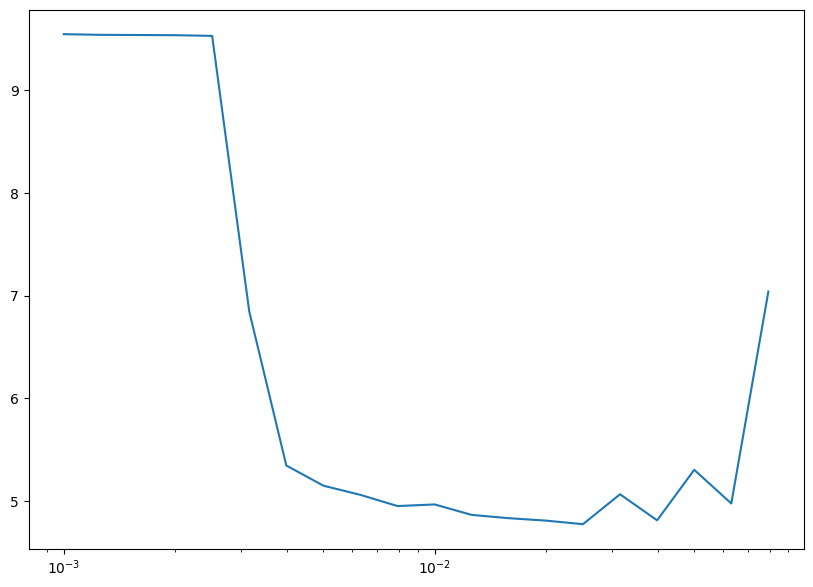

In [57]:
lrs = 1e-3 * 10 ** (tf.range(20)/10)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, model_2_history.history["val_loss"])

In [50]:
lrs

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([0.0001    , 0.00012589, 0.00015849, 0.00019953, 0.00025119,
       0.00031623, 0.00039811, 0.00050119, 0.00063096, 0.00079433])>

In [227]:
from skopt import gp_minimize
from skopt.space import Integer, Categorical, Real
from skopt.utils import use_named_args

In [409]:
def create_nn(num_dense_layers,
              num_dense_nodes,
              activation,
              learning_rate,
              kernel):

    tf.keras.backend.clear_session()
    
    print(f"\nnum_dense_layers: {num_dense_layers}\nnum_dense_nodes: {num_dense_nodes}\nactivation: {activation}\nlearning_rate: {learning_rate}\nkernel: {kernel}\n")

    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(376,), dtype=tf.float32))
    model.add(layers.Rescaling(1/255.))
    for i in range(num_dense_layers):
        model.add(layers.Dense(num_dense_nodes, kernel_initializer=kernel, activation=activation))
    model.add(layers.Dense(1, activation="linear"))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss="mae",
                  optimizer=optimizer)

    return model

In [416]:
dim_num_dense_layers = Integer(low=1, high=10, name="num_dense_layers")
dim_num_dense_nodes = Integer(low=128, high=968, name="num_dense_nodes")
dim_activation = Categorical(categories=["relu", "tanh"], name="activation")
dim_learning_rate = Real(low=1e-3, high=1e-2, name="learning_rate")
dim_dense_kernel = Categorical(categories=["glorot_normal", "glorot_uniform", "he_normal", "he_uniform"], name="kernel")

param_grid = [dim_num_dense_layers, dim_num_dense_nodes, dim_activation, dim_learning_rate, dim_dense_kernel]

In [411]:
best_mae = 0

In [412]:
@use_named_args(param_grid)
def objective(**params):

    model = create_nn(**params)

    history = model.fit(train_dataset_1,
                        validation_data=val_dataset_1,
                        epochs=10)

    mae = history.history["val_loss"][-1]

    print(f"\nMAE: {mae}\n")

    del model

    return mae

In [413]:
initial_parameters = [1, 128, "relu", 1e-3, "glorot_normal"]
objective(x=initial_parameters)


num_dense_layers: 1
num_dense_nodes: 128
activation: relu
learning_rate: 0.001
kernel: glorot_normal

Epoch 1/10
106/106 [==============================] - 1s 5ms/step - loss: 99.7193 - val_loss: 95.2453
Epoch 2/10
106/106 [==============================] - 0s 5ms/step - loss: 92.8291 - val_loss: 84.5895
Epoch 3/10
106/106 [==============================] - 0s 4ms/step - loss: 78.9019 - val_loss: 66.6157
Epoch 4/10
106/106 [==============================] - 0s 4ms/step - loss: 57.8825 - val_loss: 41.4723
Epoch 5/10
106/106 [==============================] - 0s 4ms/step - loss: 30.3390 - val_loss: 12.6103
Epoch 6/10
106/106 [==============================] - 0s 4ms/step - loss: 12.1166 - val_loss: 10.0554
Epoch 7/10
106/106 [==============================] - 0s 4ms/step - loss: 10.9867 - val_loss: 10.0052
Epoch 8/10
106/106 [==============================] - 0s 3ms/step - loss: 10.7871 - val_loss: 9.8256
Epoch 9/10
106/106 [==============================] - 0s 3ms/step - loss: 10.6013 

9.443755149841309

In [417]:
gp = gp_minimize(objective,
                 param_grid,
                 n_calls=100,
                 n_jobs=-1,
                 x0=initial_parameters,
                 acq_func="EI",
                 random_state=42)


num_dense_layers: 1
num_dense_nodes: 128
activation: relu
learning_rate: 0.001
kernel: glorot_normal

Epoch 1/10
106/106 [==============================] - 1s 5ms/step - loss: 99.7151 - val_loss: 95.2671
Epoch 2/10
106/106 [==============================] - 0s 5ms/step - loss: 92.9496 - val_loss: 84.8760
Epoch 3/10
106/106 [==============================] - 0s 5ms/step - loss: 79.3875 - val_loss: 67.3919
Epoch 4/10
106/106 [==============================] - 1s 5ms/step - loss: 58.9399 - val_loss: 42.9393
Epoch 5/10
106/106 [==============================] - 0s 4ms/step - loss: 32.0295 - val_loss: 13.9428
Epoch 6/10
106/106 [==============================] - 0s 4ms/step - loss: 12.5220 - val_loss: 10.0350
Epoch 7/10
106/106 [==============================] - 0s 4ms/step - loss: 11.0176 - val_loss: 10.0307
Epoch 8/10
106/106 [==============================] - 1s 6ms/step - loss: 10.8143 - val_loss: 9.8459
Epoch 9/10
106/106 [==============================] - 0s 4ms/step - loss: 10.6309 

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


106/106 [==============================] - 1s 5ms/step - loss: 29.9998 - val_loss: 8.2770
Epoch 2/10
106/106 [==============================] - 0s 4ms/step - loss: 8.3374 - val_loss: 6.5017
Epoch 3/10
106/106 [==============================] - 0s 4ms/step - loss: 6.8620 - val_loss: 6.3169
Epoch 4/10
106/106 [==============================] - 1s 5ms/step - loss: 6.3541 - val_loss: 5.7697
Epoch 5/10
106/106 [==============================] - 1s 5ms/step - loss: 6.0555 - val_loss: 5.5715
Epoch 6/10
106/106 [==============================] - 1s 5ms/step - loss: 5.9070 - val_loss: 5.4669
Epoch 7/10
106/106 [==============================] - 1s 5ms/step - loss: 5.7971 - val_loss: 5.5893
Epoch 8/10
106/106 [==============================] - 1s 5ms/step - loss: 5.7315 - val_loss: 5.2491
Epoch 9/10
106/106 [==============================] - 1s 5ms/step - loss: 5.5637 - val_loss: 5.2676
Epoch 10/10
106/106 [==============================] - 0s 4ms/step - loss: 5.5101 - val_loss: 5.1734

MAE: 5.1

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


106/106 [==============================] - 1s 5ms/step - loss: 45.2984 - val_loss: 9.4531
Epoch 2/10
106/106 [==============================] - 0s 4ms/step - loss: 10.0943 - val_loss: 8.8694
Epoch 3/10
106/106 [==============================] - 1s 5ms/step - loss: 9.3932 - val_loss: 7.9586
Epoch 4/10
106/106 [==============================] - 1s 5ms/step - loss: 8.3377 - val_loss: 6.7304
Epoch 5/10
106/106 [==============================] - 1s 5ms/step - loss: 7.2030 - val_loss: 5.8124
Epoch 6/10
106/106 [==============================] - 0s 4ms/step - loss: 6.5681 - val_loss: 5.4937
Epoch 7/10
106/106 [==============================] - 0s 5ms/step - loss: 6.2336 - val_loss: 5.2193
Epoch 8/10
106/106 [==============================] - 0s 5ms/step - loss: 6.0564 - val_loss: 5.1262
Epoch 9/10
106/106 [==============================] - 1s 5ms/step - loss: 5.8487 - val_loss: 4.9219
Epoch 10/10
106/106 [==============================] - 0s 4ms/step - loss: 5.7530 - val_loss: 4.8306

MAE: 4.

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


106/106 [==============================] - 1s 5ms/step - loss: 45.1797 - val_loss: 9.4539
Epoch 2/10
106/106 [==============================] - 0s 5ms/step - loss: 10.0934 - val_loss: 8.8574
Epoch 3/10
106/106 [==============================] - 0s 5ms/step - loss: 9.3792 - val_loss: 7.9402
Epoch 4/10
106/106 [==============================] - 1s 5ms/step - loss: 8.3277 - val_loss: 6.7573
Epoch 5/10
106/106 [==============================] - 0s 5ms/step - loss: 7.1895 - val_loss: 5.7813
Epoch 6/10
106/106 [==============================] - 1s 5ms/step - loss: 6.5561 - val_loss: 5.5275
Epoch 7/10
106/106 [==============================] - 0s 5ms/step - loss: 6.2211 - val_loss: 5.2194
Epoch 8/10
106/106 [==============================] - 1s 5ms/step - loss: 6.0199 - val_loss: 5.0429
Epoch 9/10
106/106 [==============================] - 1s 6ms/step - loss: 5.8806 - val_loss: 5.1001
Epoch 10/10
106/106 [==============================] - 1s 6ms/step - loss: 5.6999 - val_loss: 4.8244

MAE: 4.

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


106/106 [==============================] - 1s 7ms/step - loss: 45.2049 - val_loss: 9.4620
Epoch 2/10
106/106 [==============================] - 1s 6ms/step - loss: 10.1011 - val_loss: 8.8634
Epoch 3/10
106/106 [==============================] - 1s 5ms/step - loss: 9.4005 - val_loss: 7.9680
Epoch 4/10
106/106 [==============================] - 1s 6ms/step - loss: 8.3505 - val_loss: 6.7537
Epoch 5/10
106/106 [==============================] - 1s 6ms/step - loss: 7.2107 - val_loss: 5.7936
Epoch 6/10
106/106 [==============================] - 1s 6ms/step - loss: 6.5798 - val_loss: 5.4964
Epoch 7/10
106/106 [==============================] - 1s 6ms/step - loss: 6.2480 - val_loss: 5.2231
Epoch 8/10
106/106 [==============================] - 1s 6ms/step - loss: 6.0382 - val_loss: 5.0453
Epoch 9/10
106/106 [==============================] - 1s 5ms/step - loss: 5.8690 - val_loss: 4.9318
Epoch 10/10
106/106 [==============================] - 1s 6ms/step - loss: 5.7305 - val_loss: 4.8260

MAE: 4.

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


106/106 [==============================] - 1s 6ms/step - loss: 45.3437 - val_loss: 9.4549
Epoch 2/10
106/106 [==============================] - 1s 5ms/step - loss: 10.0970 - val_loss: 8.8679
Epoch 3/10
106/106 [==============================] - 1s 5ms/step - loss: 9.3914 - val_loss: 7.9611
Epoch 4/10
106/106 [==============================] - 1s 6ms/step - loss: 8.3388 - val_loss: 6.7589
Epoch 5/10
106/106 [==============================] - 1s 7ms/step - loss: 7.1931 - val_loss: 5.8096
Epoch 6/10
106/106 [==============================] - 1s 6ms/step - loss: 6.5535 - val_loss: 5.4858
Epoch 7/10
106/106 [==============================] - 1s 6ms/step - loss: 6.2378 - val_loss: 5.2125
Epoch 8/10
106/106 [==============================] - 1s 7ms/step - loss: 6.0307 - val_loss: 5.0551
Epoch 9/10
106/106 [==============================] - 1s 7ms/step - loss: 5.8553 - val_loss: 4.9437
Epoch 10/10
106/106 [==============================] - 1s 6ms/step - loss: 5.7138 - val_loss: 4.8409

MAE: 4.

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


106/106 [==============================] - 1s 7ms/step - loss: 24.4531 - val_loss: 7.5766
Epoch 2/10
106/106 [==============================] - 1s 5ms/step - loss: 7.7414 - val_loss: 6.3146
Epoch 3/10
106/106 [==============================] - 1s 6ms/step - loss: 6.4945 - val_loss: 5.5519
Epoch 4/10
106/106 [==============================] - 1s 7ms/step - loss: 5.9815 - val_loss: 5.4129
Epoch 5/10
106/106 [==============================] - 1s 5ms/step - loss: 5.8220 - val_loss: 5.5126
Epoch 6/10
106/106 [==============================] - 1s 6ms/step - loss: 6.0012 - val_loss: 5.4383
Epoch 7/10
106/106 [==============================] - 1s 6ms/step - loss: 6.0928 - val_loss: 5.4239
Epoch 8/10
106/106 [==============================] - 1s 7ms/step - loss: 5.9107 - val_loss: 5.4221
Epoch 9/10
106/106 [==============================] - 1s 6ms/step - loss: 5.8054 - val_loss: 5.3433
Epoch 10/10
106/106 [==============================] - 1s 6ms/step - loss: 5.7778 - val_loss: 5.2957

MAE: 5.2

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


106/106 [==============================] - 1s 9ms/step - loss: 24.5249 - val_loss: 7.6051
Epoch 2/10
106/106 [==============================] - 1s 7ms/step - loss: 7.7689 - val_loss: 6.3373
Epoch 3/10
106/106 [==============================] - 1s 11ms/step - loss: 6.5067 - val_loss: 5.5532
Epoch 4/10
106/106 [==============================] - 1s 9ms/step - loss: 6.0059 - val_loss: 5.3639
Epoch 5/10
106/106 [==============================] - 1s 7ms/step - loss: 5.8282 - val_loss: 5.3562
Epoch 6/10
106/106 [==============================] - 1s 8ms/step - loss: 5.9057 - val_loss: 5.4355
Epoch 7/10
106/106 [==============================] - 1s 8ms/step - loss: 5.8526 - val_loss: 5.5168
Epoch 8/10
106/106 [==============================] - 1s 8ms/step - loss: 5.9304 - val_loss: 5.7107
Epoch 9/10
106/106 [==============================] - 1s 8ms/step - loss: 5.9782 - val_loss: 5.4655
Epoch 10/10
106/106 [==============================] - 1s 7ms/step - loss: 5.8498 - val_loss: 5.4677

MAE: 5.

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


106/106 [==============================] - 1s 6ms/step - loss: 45.0937 - val_loss: 9.4557
Epoch 2/10
106/106 [==============================] - 1s 6ms/step - loss: 10.0958 - val_loss: 8.8561
Epoch 3/10
106/106 [==============================] - 1s 6ms/step - loss: 9.3946 - val_loss: 7.9494
Epoch 4/10
106/106 [==============================] - 1s 5ms/step - loss: 8.3330 - val_loss: 6.7131
Epoch 5/10
106/106 [==============================] - 1s 6ms/step - loss: 7.1943 - val_loss: 5.8058
Epoch 6/10
106/106 [==============================] - 1s 8ms/step - loss: 6.5798 - val_loss: 5.5307
Epoch 7/10
106/106 [==============================] - 1s 7ms/step - loss: 6.2326 - val_loss: 5.2064
Epoch 8/10
106/106 [==============================] - 1s 7ms/step - loss: 6.0310 - val_loss: 5.0629
Epoch 9/10
106/106 [==============================] - 1s 7ms/step - loss: 5.8607 - val_loss: 4.9555
Epoch 10/10
106/106 [==============================] - 1s 7ms/step - loss: 5.7177 - val_loss: 4.8296

MAE: 4.

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


106/106 [==============================] - 1s 6ms/step - loss: 44.9475 - val_loss: 9.4539
Epoch 2/10
106/106 [==============================] - 0s 5ms/step - loss: 10.0939 - val_loss: 8.8527
Epoch 3/10
106/106 [==============================] - 1s 5ms/step - loss: 9.3802 - val_loss: 7.9267
Epoch 4/10
106/106 [==============================] - 0s 5ms/step - loss: 8.3073 - val_loss: 6.7421
Epoch 5/10
106/106 [==============================] - 1s 5ms/step - loss: 7.1746 - val_loss: 5.7812
Epoch 6/10
106/106 [==============================] - 1s 6ms/step - loss: 6.5594 - val_loss: 5.5600
Epoch 7/10
106/106 [==============================] - 1s 5ms/step - loss: 6.2369 - val_loss: 5.2070
Epoch 8/10
106/106 [==============================] - 1s 5ms/step - loss: 6.0279 - val_loss: 5.0436
Epoch 9/10
106/106 [==============================] - 0s 5ms/step - loss: 5.8565 - val_loss: 4.9518
Epoch 10/10
106/106 [==============================] - 1s 5ms/step - loss: 5.7007 - val_loss: 4.8304

MAE: 4.

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


106/106 [==============================] - 1s 7ms/step - loss: 44.8934 - val_loss: 9.4411
Epoch 2/10
106/106 [==============================] - 1s 6ms/step - loss: 10.0777 - val_loss: 8.8318
Epoch 3/10
106/106 [==============================] - 1s 5ms/step - loss: 9.3503 - val_loss: 7.9018
Epoch 4/10
106/106 [==============================] - 1s 6ms/step - loss: 8.2840 - val_loss: 6.6975
Epoch 5/10
106/106 [==============================] - 1s 6ms/step - loss: 7.1701 - val_loss: 5.7852
Epoch 6/10
106/106 [==============================] - 1s 5ms/step - loss: 6.5566 - val_loss: 5.4762
Epoch 7/10
106/106 [==============================] - 1s 5ms/step - loss: 6.2403 - val_loss: 5.2126
Epoch 8/10
106/106 [==============================] - 1s 6ms/step - loss: 6.0340 - val_loss: 5.0477
Epoch 9/10
106/106 [==============================] - 1s 6ms/step - loss: 5.8621 - val_loss: 4.9178
Epoch 10/10
106/106 [==============================] - 1s 6ms/step - loss: 5.7184 - val_loss: 4.8315

MAE: 4.

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


106/106 [==============================] - 1s 8ms/step - loss: 24.5463 - val_loss: 7.5794
Epoch 2/10
106/106 [==============================] - 1s 6ms/step - loss: 7.8073 - val_loss: 6.3190
Epoch 3/10
106/106 [==============================] - 1s 7ms/step - loss: 6.5691 - val_loss: 5.5518
Epoch 4/10
106/106 [==============================] - 1s 8ms/step - loss: 6.0710 - val_loss: 5.3427
Epoch 5/10
106/106 [==============================] - 1s 7ms/step - loss: 5.7646 - val_loss: 5.3096
Epoch 6/10
106/106 [==============================] - 1s 7ms/step - loss: 5.8253 - val_loss: 5.3204
Epoch 7/10
106/106 [==============================] - 1s 7ms/step - loss: 5.7744 - val_loss: 5.4639
Epoch 8/10
106/106 [==============================] - 1s 7ms/step - loss: 5.9857 - val_loss: 5.5991
Epoch 9/10
106/106 [==============================] - 1s 7ms/step - loss: 5.9065 - val_loss: 5.5217
Epoch 10/10
106/106 [==============================] - 1s 7ms/step - loss: 5.9202 - val_loss: 5.4250

MAE: 5.4

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


106/106 [==============================] - 1s 6ms/step - loss: 55.0697 - val_loss: 9.9308
Epoch 2/10
106/106 [==============================] - 0s 5ms/step - loss: 10.1873 - val_loss: 8.2678
Epoch 3/10
106/106 [==============================] - 1s 5ms/step - loss: 8.8256 - val_loss: 7.2964
Epoch 4/10
106/106 [==============================] - 1s 5ms/step - loss: 7.8076 - val_loss: 6.6562
Epoch 5/10
106/106 [==============================] - 1s 6ms/step - loss: 7.1170 - val_loss: 6.1988
Epoch 6/10
106/106 [==============================] - 1s 6ms/step - loss: 6.6769 - val_loss: 5.8467
Epoch 7/10
106/106 [==============================] - 1s 6ms/step - loss: 6.3892 - val_loss: 5.6927
Epoch 8/10
106/106 [==============================] - 1s 6ms/step - loss: 6.1985 - val_loss: 5.4648
Epoch 9/10
106/106 [==============================] - 1s 6ms/step - loss: 6.0949 - val_loss: 5.3318
Epoch 10/10
106/106 [==============================] - 1s 6ms/step - loss: 5.9675 - val_loss: 5.3140

MAE: 5.

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


106/106 [==============================] - 1s 6ms/step - loss: 45.0665 - val_loss: 9.4457
Epoch 2/10
106/106 [==============================] - 0s 5ms/step - loss: 10.0901 - val_loss: 8.8528
Epoch 3/10
106/106 [==============================] - 1s 5ms/step - loss: 9.3684 - val_loss: 7.9294
Epoch 4/10
106/106 [==============================] - 1s 5ms/step - loss: 8.3101 - val_loss: 6.7426
Epoch 5/10
106/106 [==============================] - 1s 5ms/step - loss: 7.1800 - val_loss: 5.7908
Epoch 6/10
106/106 [==============================] - 0s 5ms/step - loss: 6.5806 - val_loss: 5.5442
Epoch 7/10
106/106 [==============================] - 1s 6ms/step - loss: 6.2337 - val_loss: 5.2196
Epoch 8/10
106/106 [==============================] - 1s 6ms/step - loss: 6.0315 - val_loss: 5.0518
Epoch 9/10
106/106 [==============================] - 1s 6ms/step - loss: 5.8555 - val_loss: 4.9322
Epoch 10/10
106/106 [==============================] - 1s 5ms/step - loss: 5.7614 - val_loss: 4.9158

MAE: 4.

In [418]:
print(f"Best score: {gp.fun}")

Best score: 4.464505195617676


In [419]:
print("Best parameters:\nnum_dense_layers: %d\nnum_dense_nodes: %d\nactivation: %s\nlearning_rate: %.6f\nkernel: %s" % (gp.x[0], gp.x[1], gp.x[2], gp.x[3], gp.x[4]))

Best parameters:
num_dense_layers: 7
num_dense_nodes: 506
activation: relu
learning_rate: 0.009480
kernel: he_normal


In [88]:
model_3 = tf.keras.Sequential([
    layers.Input(shape=(376,), dtype=tf.float32),
    layers.Dense(512, activation="tanh"),
    layers.Dense(1, activation="linear")
], name="model_3_bo")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3_history = model_3.fit(train_dataset_1,
                              validation_data=val_dataset_1,
                              epochs=20,
                              callbacks=[tensorboard(model_3.name),
                                         checkpoint(model_3.name)])

Epoch 1/20
106/106 [==============================] - 2s 11ms/step - loss: 57.3830 - val_loss: 23.6285
Epoch 2/20
106/106 [==============================] - 1s 6ms/step - loss: 12.7663 - val_loss: 9.5229
Epoch 3/20
106/106 [==============================] - 1s 6ms/step - loss: 10.1498 - val_loss: 9.4929
Epoch 4/20
106/106 [==============================] - 1s 7ms/step - loss: 9.3618 - val_loss: 7.3478
Epoch 5/20
106/106 [==============================] - 1s 6ms/step - loss: 7.0218 - val_loss: 5.2788
Epoch 6/20
106/106 [==============================] - 1s 6ms/step - loss: 5.6750 - val_loss: 4.6384
Epoch 7/20
106/106 [==============================] - 1s 6ms/step - loss: 5.2866 - val_loss: 4.5903
Epoch 8/20
106/106 [==============================] - 0s 4ms/step - loss: 5.1444 - val_loss: 4.6105
Epoch 9/20
106/106 [==============================] - 1s 7ms/step - loss: 5.0518 - val_loss: 4.4960
Epoch 10/20
106/106 [==============================] - 1s 7ms/step - loss: 4.9922 - val_loss: 4

In [89]:
model_3_preds = model_3.predict(val_dataset_1)
model_3_r2 = r2_score(val_target, tf.squeeze(model_3_preds))
model_3_r2

0.6417449969674033

In [90]:
val_target[:10]

array([108.21, 105.82, 108.19,  94.62, 110.46,  88.98, 108.84, 109.93,
       104.89,  99.65])

In [91]:
tf.squeeze(model_3_preds)[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([107.70192 ,  90.692986, 108.712105,  91.97529 , 106.38257 ,
        90.71417 ,  90.16152 , 108.030304,  89.67147 , 104.088005],
      dtype=float32)>

In [95]:
%load_ext tensorboard

In [96]:
%tensorboard --logdir model_logs/greener_manufacturing --port 8090

In [102]:
model_4 = tf.keras.Sequential([
    layers.Input(shape=(376,), dtype=tf.float32),
    layers.Dense(640, activation="tanh"),
    layers.Dense(1, activation="linear")
], name="model_4_bo_2")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4_history = model_4.fit(train_dataset_1,
                              validation_data=val_dataset_1,
                              epochs=20,
                              callbacks=[tensorboard(model_4.name),
                                         checkpoint(model_4.name)])

Epoch 1/20
106/106 [==============================] - 1s 10ms/step - loss: 46.4458 - val_loss: 10.2204
Epoch 2/20
106/106 [==============================] - 1s 7ms/step - loss: 10.2342 - val_loss: 9.5065
Epoch 3/20
106/106 [==============================] - 1s 6ms/step - loss: 9.9587 - val_loss: 8.5510
Epoch 4/20
106/106 [==============================] - 1s 6ms/step - loss: 8.1124 - val_loss: 6.1744
Epoch 5/20
106/106 [==============================] - 1s 7ms/step - loss: 6.1057 - val_loss: 4.7509
Epoch 6/20
106/106 [==============================] - 1s 6ms/step - loss: 5.3885 - val_loss: 4.6832
Epoch 7/20
106/106 [==============================] - 1s 7ms/step - loss: 5.1990 - val_loss: 4.6101
Epoch 8/20
106/106 [==============================] - 1s 7ms/step - loss: 5.0954 - val_loss: 4.5467
Epoch 9/20
106/106 [==============================] - 0s 4ms/step - loss: 5.0105 - val_loss: 4.5565
Epoch 10/20
106/106 [==============================] - 1s 8ms/step - loss: 4.9776 - val_loss: 4.

In [103]:
model_4_preds = model_4.predict(val_dataset_1)
model_4_r2 = r2_score(val_target, tf.squeeze(model_4_preds))
model_4_r2

0.6480955758204163

In [104]:
model_4_train_preds = model_4.predict(train_dataset_1)
model_4_train_r2 = r2_score(train_target, tf.squeeze(model_4_train_preds))
model_4_train_r2

0.4806961559984243

In [105]:
%tensorboard --logdir model_logs/greener_manufacturing --port 8090

Reusing TensorBoard on port 8090 (pid 32896), started 0:12:03 ago. (Use '!kill 32896' to kill it.)

In [106]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,33,24,18,1,4,25,10,15,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,33,22,20,5,4,29,12,15,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,21,25,35,3,4,28,10,24,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,21,22,35,6,4,28,12,5,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,21,24,35,6,4,13,4,14,...,0,0,0,0,0,0,0,0,0,0


In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [116]:
cat_keys = cat_dict.keys()
cat_keys = np.array(list(cat_keys))
cat_keys

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='<U2')

In [123]:
ct = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), cat_keys)], remainder="passthrough")

train_data_one_hot_features = ct.fit_transform(train_data.drop(["ID", "y"], axis = 1))
train_data_one_hot_features.shape

(4209, 563)

In [124]:
train_features.shape

(3367, 376)

In [127]:
train_one_hot_features = train_data_one_hot_features[:split_size]
val_one_hot_features = train_data_one_hot_features[split_size:]
len(train_one_hot_features), len(val_one_hot_features)

(3367, 842)

In [129]:
len(train_target), len(val_target)

(3367, 842)

In [136]:
train_features_2 = tf.data.Dataset.from_tensor_slices(tf.cast(train_one_hot_features, dtype=tf.float32))
train_target_2 = tf.data.Dataset.from_tensor_slices(tf.cast(train_target, dtype=tf.float32))
train_dataset_2 = tf.data.Dataset.zip((train_features_2, train_target_2)).batch(32).prefetch(tf.data.AUTOTUNE)

val_features_2 = tf.data.Dataset.from_tensor_slices(tf.cast(val_one_hot_features, dtype=tf.float32))
val_target_2 = tf.data.Dataset.from_tensor_slices(tf.cast(val_target, dtype=tf.float32))
val_dataset_2 = tf.data.Dataset.zip((val_features_2, val_target_2)).batch(32).prefetch(tf.data.AUTOTUNE)

In [135]:
train_one_hot_features[0].shape

(563,)

In [140]:
model_5 = tf.keras.Sequential([
    layers.Input(shape=(563,), dtype=tf.float32),
    layers.Dense(512, activation="tanh"),
    layers.Dense(1, activation="linear")
], name="model_5_one_hot")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5_history = model_5.fit(train_dataset_2,
                              validation_data=val_dataset_2,
                              epochs=20,
                              callbacks=[tensorboard(model_5.name),
                                         checkpoint(model_5.name)])

Epoch 1/20
106/106 [==============================] - 1s 10ms/step - loss: 51.6521 - val_loss: 15.7320
Epoch 2/20
106/106 [==============================] - 1s 8ms/step - loss: 10.8508 - val_loss: 9.4362
Epoch 3/20
106/106 [==============================] - 1s 7ms/step - loss: 9.7502 - val_loss: 7.6901
Epoch 4/20
106/106 [==============================] - 1s 7ms/step - loss: 6.7546 - val_loss: 4.6482
Epoch 5/20
106/106 [==============================] - 1s 8ms/step - loss: 5.2982 - val_loss: 4.4954
Epoch 6/20
106/106 [==============================] - 1s 7ms/step - loss: 5.0545 - val_loss: 4.4774
Epoch 7/20
106/106 [==============================] - 1s 7ms/step - loss: 4.9472 - val_loss: 4.4114
Epoch 8/20
106/106 [==============================] - 0s 4ms/step - loss: 4.8907 - val_loss: 4.4516
Epoch 9/20
106/106 [==============================] - 0s 3ms/step - loss: 4.8455 - val_loss: 4.4388
Epoch 10/20
106/106 [==============================] - 1s 7ms/step - loss: 4.8053 - val_loss: 4.

In [141]:
%tensorboard --logdir model_logs/greener_manufacturing --port 8090

Reusing TensorBoard on port 8090 (pid 32896), started 0:36:07 ago. (Use '!kill 32896' to kill it.)

In [142]:
model_5_train_preds = model_5.predict(train_dataset_2)
model_5_train_r2 = r2_score(train_target, tf.squeeze(model_5_train_preds))
model_5_train_r2

0.5351702184135251

In [143]:
model_5_preds = model_5.predict(val_dataset_2)
model_5_r2 = r2_score(val_target, tf.squeeze(model_5_preds))
model_5_r2

0.6579319246537416

In [156]:
model_5_loaded = tf.keras.models.load_model(CHECKPOINT_PATH + "/" + model_5.name)
model_5_loaded_preds = model_5_loaded.predict(val_dataset_2)
model_5_loaded_r2 = r2_score(val_target, tf.squeeze(model_5_loaded_preds))
model_5_loaded_r2

0.6537673556087245

In [157]:
model_5_loaded_train_preds = model_5_loaded.predict(train_dataset_2)
model_5_loaded_train_r2 = r2_score(train_target, tf.squeeze(model_5_loaded_train_preds))
model_5_loaded_train_r2

0.49641623682750535

In [155]:
model_6 = tf.keras.Sequential([
    layers.Input(shape=(563,), dtype=tf.float32),
    layers.Dense(198, activation="tanh"),
    layers.Dense(1, activation="linear")
], name="model_6_one_hot")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6_history = model_6.fit(train_dataset_2,
                              validation_data=val_dataset_2,
                              epochs=30,
                              callbacks=[tensorboard(model_6.name),
                                         checkpoint(model_6.name)])

Epoch 1/30
106/106 [==============================] - 1s 11ms/step - loss: 76.2270 - val_loss: 59.9536
Epoch 2/30
106/106 [==============================] - 1s 8ms/step - loss: 50.6719 - val_loss: 37.2696
Epoch 3/30
106/106 [==============================] - 1s 7ms/step - loss: 28.5849 - val_loss: 16.3016
Epoch 4/30
106/106 [==============================] - 1s 7ms/step - loss: 12.5436 - val_loss: 9.6110
Epoch 5/30
106/106 [==============================] - 1s 7ms/step - loss: 10.2520 - val_loss: 9.4956
Epoch 6/30
106/106 [==============================] - 0s 4ms/step - loss: 10.1399 - val_loss: 9.4971
Epoch 7/30
106/106 [==============================] - 1s 8ms/step - loss: 9.4965 - val_loss: 7.0397
Epoch 8/30
106/106 [==============================] - 1s 6ms/step - loss: 7.0046 - val_loss: 4.9064
Epoch 9/30
106/106 [==============================] - 1s 6ms/step - loss: 5.5296 - val_loss: 4.4882
Epoch 10/30
106/106 [==============================] - 0s 4ms/step - loss: 5.1513 - val_lo

In [158]:
model_6_train_preds = model_6.predict(train_dataset_2)
model_6_train_r2 = r2_score(train_target, tf.squeeze(model_6_train_preds))
model_6_train_r2

0.565138307115874

In [159]:
model_6_preds = model_6.predict(val_dataset_2)
model_6_r2 = r2_score(val_target, tf.squeeze(model_6_preds))
model_6_r2

0.6602734619347431

In [183]:
tf.keras.backend.clear_session()

model_7 = tf.keras.Sequential([
    layers.Input(shape=(376,), dtype=tf.float32),
    layers.Dense(216, activation="tanh"),
    layers.Dense(104, activation="tanh"),
    layers.Dense(1, activation="linear")
], name="model_7")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_7_history = model_7.fit(train_dataset_1,
                              validation_data=val_dataset_1,
                              epochs=30,
                              callbacks=[tensorboard(model_7.name),
                                         checkpoint(model_7.name)])

Epoch 1/30
106/106 [==============================] - 1s 9ms/step - loss: 85.5173 - val_loss: 76.9824
Epoch 2/30
106/106 [==============================] - 1s 9ms/step - loss: 73.3827 - val_loss: 65.6088
Epoch 3/30
106/106 [==============================] - 1s 9ms/step - loss: 62.0739 - val_loss: 54.3454
Epoch 4/30
106/106 [==============================] - 1s 8ms/step - loss: 50.8351 - val_loss: 43.1263
Epoch 5/30
106/106 [==============================] - 2s 16ms/step - loss: 39.6290 - val_loss: 31.9312
Epoch 6/30
106/106 [==============================] - 1s 7ms/step - loss: 28.4832 - val_loss: 21.0750
Epoch 7/30
106/106 [==============================] - 1s 9ms/step - loss: 18.2344 - val_loss: 11.9412
Epoch 8/30
106/106 [==============================] - 1s 8ms/step - loss: 11.7222 - val_loss: 9.8139
Epoch 9/30
106/106 [==============================] - 1s 8ms/step - loss: 10.5240 - val_loss: 9.5369
Epoch 10/30
106/106 [==============================] - 1s 8ms/step - loss: 10.2455 

In [184]:
model_7_train_preds = model_7.predict(train_dataset_1)
model_7_train_r2 = r2_score(train_target, tf.squeeze(model_7_train_preds))
model_7_train_r2

0.5095615914372469

In [185]:
model_7_preds = model_7.predict(val_dataset_1)
model_7_r2 = r2_score(val_target, tf.squeeze(model_7_preds))
model_7_r2

0.667660046923078

In [194]:
model_7_loaded = tf.keras.models.load_model(CHECKPOINT_PATH + "/" + model_7.name)
model_7_loaded_train_preds = model_7_loaded.predict(train_dataset_1)
model_7_loaded_train_r2 = r2_score(train_target, tf.squeeze(model_7_loaded_train_preds))
model_7_loaded_train_r2

0.5095615914372469

In [189]:
test_data[test_data["X0"] == 0]

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
153,289,0,5,3,3,4,15,7,6,0,...,0,0,1,0,0,0,0,0,0,0
311,624,0,14,17,6,4,14,10,21,0,...,0,0,0,0,0,0,0,0,0,0
2914,5816,0,5,3,3,4,21,5,23,0,...,0,0,1,0,0,0,0,0,0,0
3281,6585,0,4,3,3,4,22,10,5,0,...,0,0,1,0,0,0,0,0,0,0
3718,7420,0,24,17,1,4,26,1,7,0,...,0,0,1,0,0,0,0,0,0,0
3913,7805,0,22,20,6,4,27,1,7,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
train_data[train_data["X0"] == 0]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


In [190]:
test_id = test_data["ID"].to_numpy()

In [191]:
test_features = test_data.drop("ID", axis = 1).to_numpy()

In [192]:
test_features.shape

(4209, 376)

In [193]:
test_features = tf.data.Dataset.from_tensor_slices(test_features).batch(32).prefetch(tf.data.AUTOTUNE)

In [197]:
test_id.shape

(4209,)

In [ ]:
Best parameters:
num_dense_layers: 3
num_dense_nodes: 474
activation: relu
dropout: 0.50
learning_rate: 0.004547
kernel: glorot_uniform

In [382]:
tf.keras.backend.clear_session()

model_8 = tf.keras.Sequential([
    layers.Input(shape=(376,), dtype=tf.float32),
    layers.Rescaling(1/255.),
    layers.Dense(474, kernel_initializer="glorot_uniform", activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(474, kernel_initializer="glorot_uniform", activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(474, kernel_initializer="glorot_uniform", activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(474, kernel_initializer="glorot_uniform", activation="relu"),
    layers.Dense(474, kernel_initializer="glorot_uniform", activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(474, kernel_initializer="glorot_uniform", activation="relu"),
    layers.Dense(1, activation="linear")
], name="model_8")

print(gp.x[4])

optimizer = tf.keras.optimizers.Adam(learning_rate=gp.x[4])

model_8.compile(loss="mae",
                optimizer=optimizer)

model_8_history = model_8.fit(train_dataset_1,
                              validation_data=val_dataset_1,
                              epochs=30,
                              callbacks=[tensorboard(model_8.name),
                                         checkpoint(model_8.name)])

0.004547051234970231
Epoch 1/30
106/106 [==============================] - 3s 21ms/step - loss: 22.7684 - val_loss: 14.5259
Epoch 2/30
106/106 [==============================] - 2s 17ms/step - loss: 13.0159 - val_loss: 12.6513
Epoch 3/30
106/106 [==============================] - 2s 17ms/step - loss: 11.4105 - val_loss: 5.5755
Epoch 4/30
106/106 [==============================] - 1s 5ms/step - loss: 11.0468 - val_loss: 5.6245
Epoch 5/30
106/106 [==============================] - 1s 6ms/step - loss: 10.4487 - val_loss: 8.0749
Epoch 6/30
106/106 [==============================] - 1s 5ms/step - loss: 9.7404 - val_loss: 6.4673
Epoch 7/30
106/106 [==============================] - 3s 25ms/step - loss: 9.8595 - val_loss: 5.1064
Epoch 8/30
106/106 [==============================] - 1s 5ms/step - loss: 9.6541 - val_loss: 9.5047
Epoch 9/30
106/106 [==============================] - 1s 5ms/step - loss: 9.8275 - val_loss: 6.1456
Epoch 10/30
106/106 [==============================] - 2s 17ms/step 

In [383]:
model_8.evaluate(val_dataset_1), model_8.evaluate(train_dataset_1)

106/106 [==============================] - 0s 2ms/step - loss: 6.3032


(5.200592994689941, 6.303225040435791)

In [384]:
model_8_loaded = tf.keras.models.load_model(CHECKPOINT_PATH + "/" + model_8.name)
model_8_loaded.evaluate(val_dataset_1), model_8_loaded.evaluate(train_dataset_1)

106/106 [==============================] - 0s 2ms/step - loss: 5.7525


(4.505660533905029, 5.752542972564697)

In [385]:
model_8_train_preds = model_8.predict(train_dataset_1)
model_8_train_r2 = r2_score(train_target, tf.squeeze(model_8_train_preds))
model_8_train_r2

0.3836053152775497

In [386]:
model_8_preds = model_8.predict(val_dataset_1)
model_8_r2 = r2_score(val_target, tf.squeeze(model_8_preds))
model_8_r2

0.5673379389335982

In [387]:
model_8_loaded_train_preds = model_8_loaded.predict(train_dataset_1)
model_8_loaded_train_r2 = r2_score(train_target, tf.squeeze(model_8_loaded_train_preds))
model_8_loaded_train_r2

0.42561689908712663

In [388]:
model_8_loaded_preds = model_8_loaded.predict(val_dataset_1)
model_8_loaded_r2 = r2_score(val_target, tf.squeeze(model_8_loaded_preds))
model_8_loaded_r2

0.6205107872463133

In [403]:
test_preds = tf.squeeze(model_4.predict(test_features))
test_preds

<tf.Tensor: shape=(4209,), dtype=float32, numpy=
array([ 75.24222 ,  89.40934 ,  73.28183 , ...,  91.34294 , 104.086754,
        90.10238 ], dtype=float32)>

In [404]:
test_df = pd.DataFrame({"ID": list(test_id),
                        "y": list(test_preds.numpy())})
test_df.tail()

,ID,y
4204,8410,97.000732
4205,8411,89.417847
4206,8413,91.342941
4207,8414,104.086754
4208,8416,90.102379


In [405]:
test_df.to_csv("greener_manufacturing_regression_submission_1.csv", index=False)